In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [73]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor
)
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv("insurance.csv")
df = df.copy()

In [75]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [77]:
df.shape

(1338, 7)

In [78]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [79]:
df.duplicated().sum()

1

In [80]:
df = df.drop(df[df.duplicated()].index)

In [81]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'BMI Distribution')

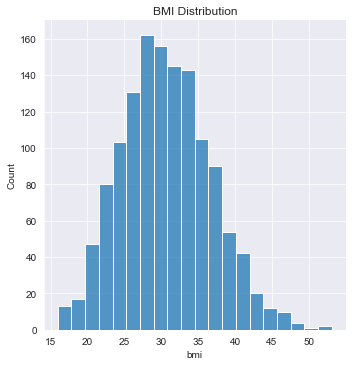

In [82]:
sns.displot(df, x="bmi",bins=20)
plt.title("BMI Distribution")

Text(0.5, 1.0, 'Charges by Smoking Habit')

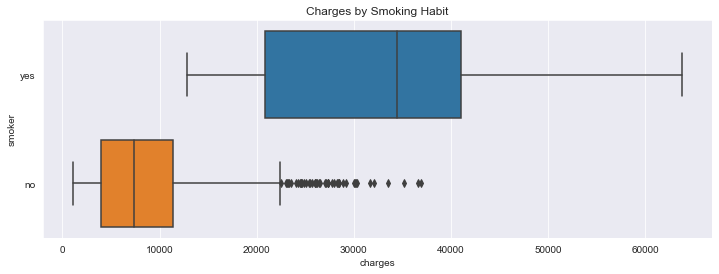

In [83]:
plt.figure(figsize = (12, 4))
sns.boxplot(y = df['smoker'], x = df['charges'])
plt.title('Charges by Smoking Habit')

Text(0.5, 1.0, 'BMI / Charges')

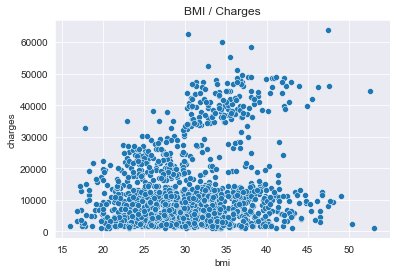

In [84]:
sns.scatterplot(df, x="bmi", y="charges")
plt.title("BMI / Charges")

region
southeast    364
southwest    325
northeast    324
northwest    324
dtype: int64

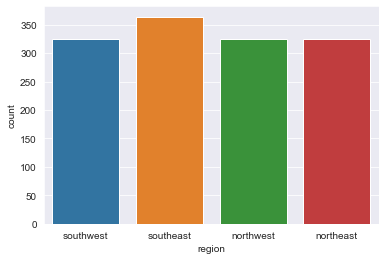

In [85]:
sns.countplot(df, x="region")
df.value_counts("region")

Text(0.5, 1.0, 'Smokers by region')

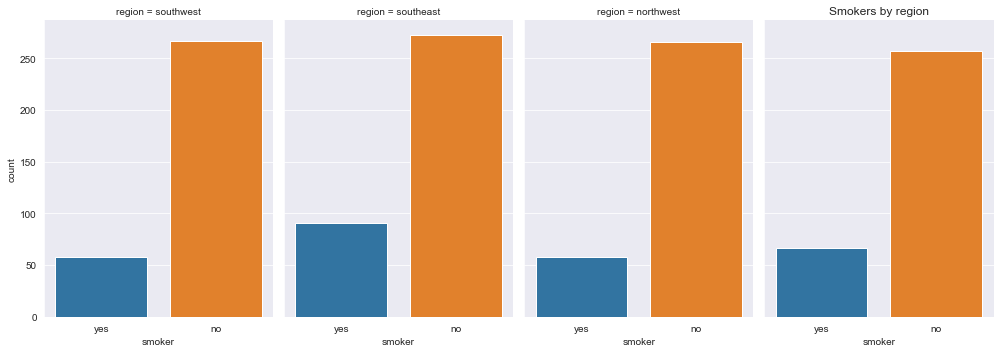

In [86]:
sns.catplot(x = 'smoker', col = 'region', data = df, kind = 'count', aspect = 0.7)
plt.title("Smokers by region")

Text(0.5, 1.0, 'Children by region')

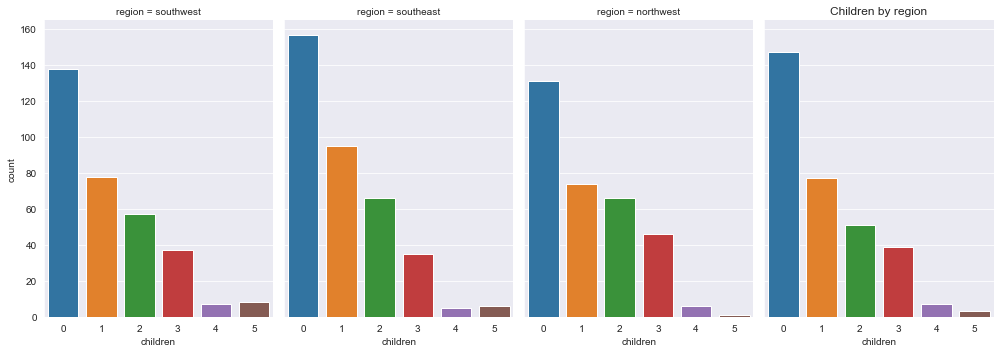

In [87]:
sns.catplot(x ='children', col = 'region', data = df, kind = 'count', aspect= 0.7)
plt.title("Children by region")

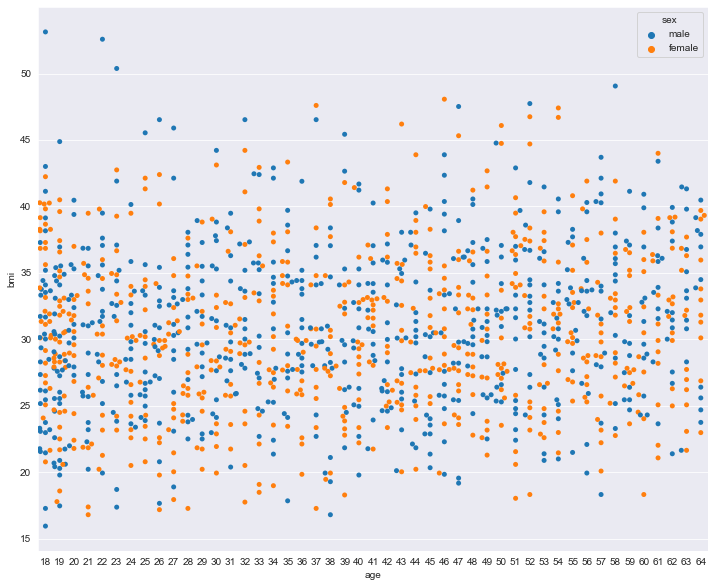

In [88]:
plt.figure(figsize=(12,10))
sns.swarmplot(y='bmi',x='age',hue='sex',data=df)
plt.show()

<AxesSubplot:xlabel='children', ylabel='bmi'>

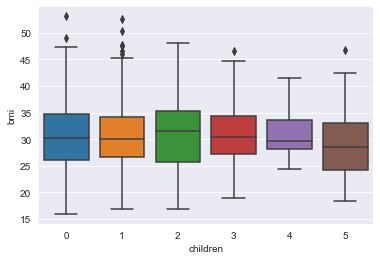

In [89]:
sns.boxplot(df, y="bmi", x="children")

Text(0.5, 1.0, 'Outliers in BMI')

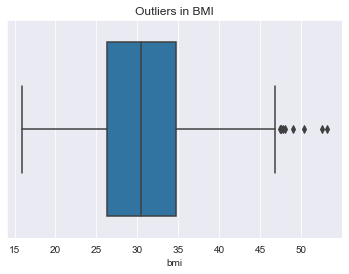

In [90]:
sns.boxplot(x=df["bmi"])
plt.title("Outliers in BMI")

Text(0.5, 1.0, 'BMI / Region Values by Smoking Habit')

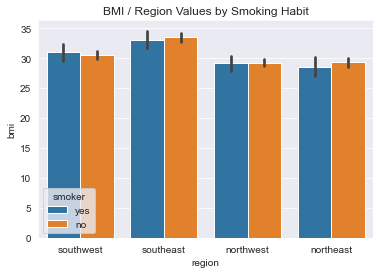

In [91]:
sns.barplot(df, x="region", y="bmi", hue="smoker")
plt.title("BMI / Region Values by Smoking Habit")

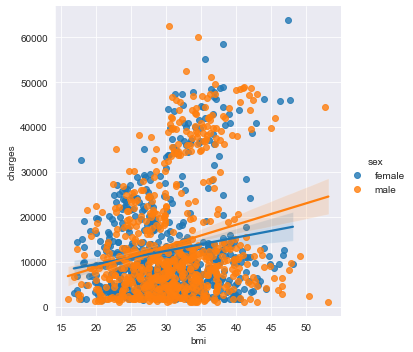

In [92]:
sns.lmplot(x="bmi", y="charges", hue="sex", data=df)

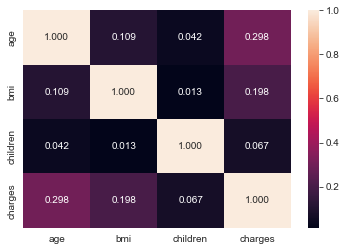

In [93]:
list1=["age","bmi","children","charges","smoker","sex","region"]
sns.heatmap(df[list1].corr(),annot=True,fmt=".3f")
plt.show()

Data Processing

In [94]:
#Label Encoding
df[['smoker', 'sex']] = df[['smoker', 'sex']].apply(LabelEncoder().fit_transform)

In [95]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [96]:
#One-hot encoding
hot_encode = pd.get_dummies(df["region"])
hot_encode.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [97]:
df = pd.concat([df,hot_encode], axis =1)
df.drop("region", axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [98]:
X = df.drop("charges", axis =1)
y= df["charges"]

In [99]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X = scale.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 0, test_size= 0.2)

In [101]:
# Create a list of algorithms to compare
algorithms = [GradientBoostingRegressor(),
              SGDRegressor(),
              LinearRegression(),
              RandomForestRegressor(),
              DecisionTreeRegressor(),
              AdaBoostRegressor()]

In [102]:
def evaluate_models(algorithm, X, y):

    n, train_score, val_score = learning_curve(
        algorithm, X, y,
        cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(8, 3))
    plt.plot(n, train_score.mean(axis=1), label='train_score')
    plt.plot(n, val_score.mean(axis=1), label='val_score')
    plt.legend()
    plt.title(f'{algorithm}', fontsize=18)

    train_scores.append(train_score[-1].mean())
    val_scores.append(val_score[-1].mean())



    print(f'{algorithm}')
    print("train_score =", "%0.3f" % train_score[-1].mean())
    print("val_score =", "%0.3f" % val_score[-1].mean())
    plt.show()
    print("-"*20)


GradientBoostingRegressor()
train_score = 0.904
val_score = 0.855


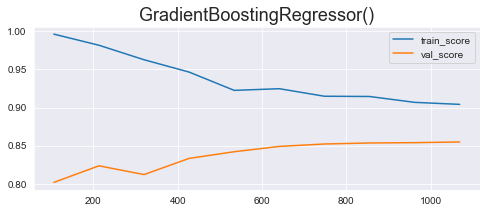

--------------------
SGDRegressor()
train_score = 0.750
val_score = 0.746


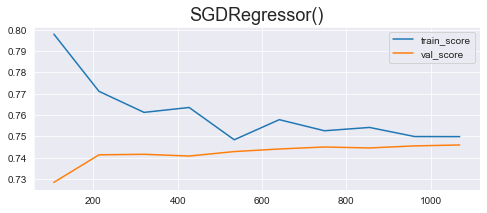

--------------------
LinearRegression()
train_score = 0.751
val_score = 0.747


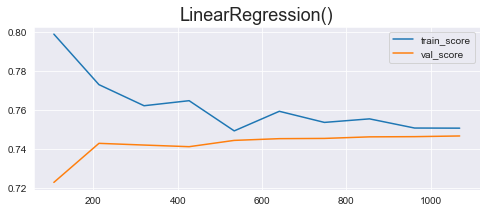

--------------------
RandomForestRegressor()
train_score = 0.977
val_score = 0.838


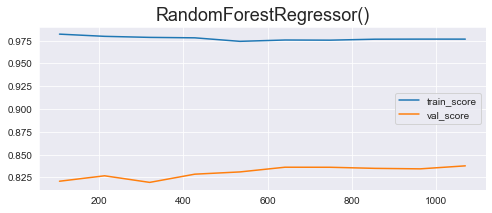

--------------------
DecisionTreeRegressor()
train_score = 0.999
val_score = 0.717


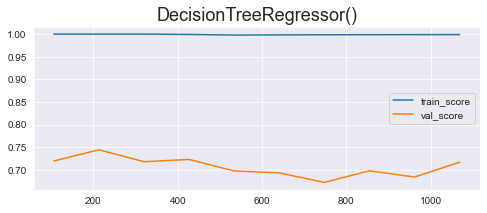

--------------------
AdaBoostRegressor()
train_score = 0.839
val_score = 0.822


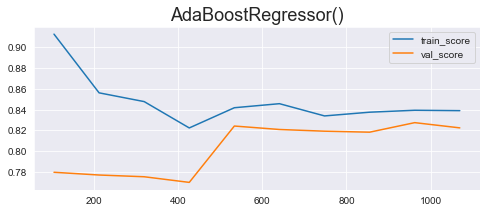

--------------------


In [103]:
train_scores = []
val_scores = []

for a in algorithms:
    evaluate_models(a, X, y)

In [109]:
models_names = ['GradientBoostingRegressor',
                'SGDRegressor',
                'LinearRegression',
                'RandomForestRegressor',
                'DecisionTreeRegressor',
                'AdaBoostRegressor']

In [110]:
scores = pd.DataFrame(
    {
        'model': models_names + models_names,
        'scores': train_scores + val_scores,
        'score_type': ['train'] * len(models_names)
        + ['validation'] * len(models_names)
    }
)

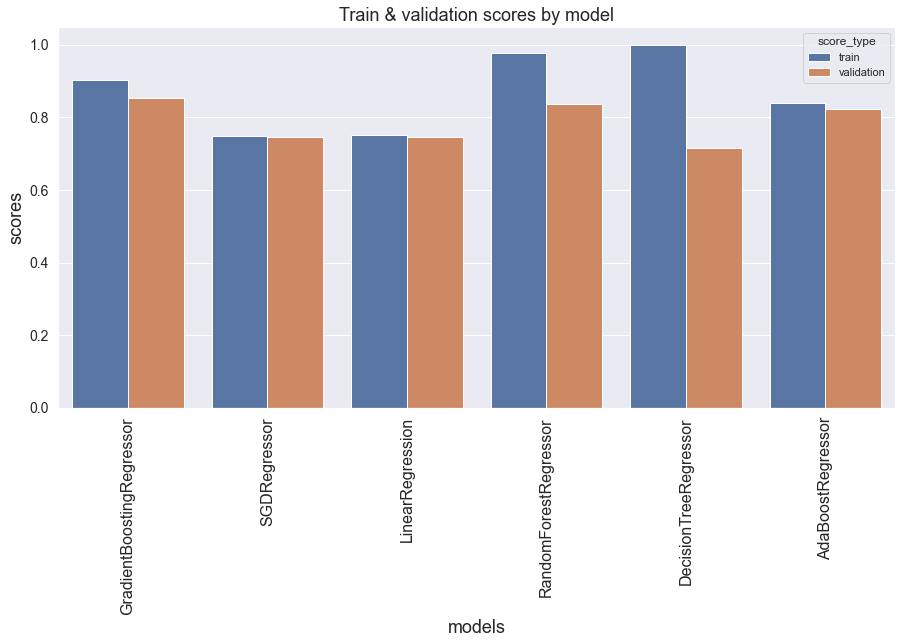

In [112]:
sns.set()


plt.figure(figsize=(15,7))
sns.barplot(x='model', y='scores', hue='score_type', data=scores)
plt.title('Train & validation scores by model', fontsize=18)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel("scores", fontsize=18)
plt.xlabel("models", fontsize=18);

In [ ]:
#Conclusion
GradientBoostingRegressor is the most succesful model.